In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
import emcee
import sys
%matplotlib inline

In [2]:
logger = phoebe.logger()

In [3]:
b = phoebe.default_binary()

In [4]:
b.add_constraint('semidetached', 'primary')

<ParameterSet: 1 parameters>

In [5]:
b.add_constraint('semidetached', 'secondary')

<ParameterSet: 1 parameters>

In [6]:
b.add_feature('spot', component='primary', feature='spot01', relteff=0.9, radius=15, colat=90, long=-45)

Sat, 10 Oct 2020 15:58 PARAMETERS   WARNING wrapping value of long to 315.0 deg


<ParameterSet: 5 parameters | contexts: feature, compute>

In [7]:
b['period@orbit'] = 1
b['sma@orbit'] = 3.5

b['q@binary'] = 0.44
b['incl@binary'] = 78
#b['requiv@primary'] = 1.73
#b['requiv@secondary'] = 1.4
b['teff@primary'] = 5660
b['teff@secondary'] = 5656.

In [8]:
times = np.linspace(0, 1, 150)
b.add_dataset('lc', times=times, passband='Johnson:B')

<ParameterSet: 78 parameters | contexts: figure, dataset, compute, constraint>

In [9]:
b.add_dataset('mesh', times=[0.25], columns='teffs') 

Sat, 10 Oct 2020 15:58 BUNDLE       WARNING mesh dataset uses 'compute_times' instead of 'times', applying value sent as 'times' to 'compute_times'.


<ParameterSet: 85 parameters | contexts: figure, dataset, compute, constraint>

In [10]:
b.run_compute()

100%|██████████| 151/151 [00:16<00:00,  8.94it/s]


<ParameterSet: 15 parameters | kinds: mesh, lc>

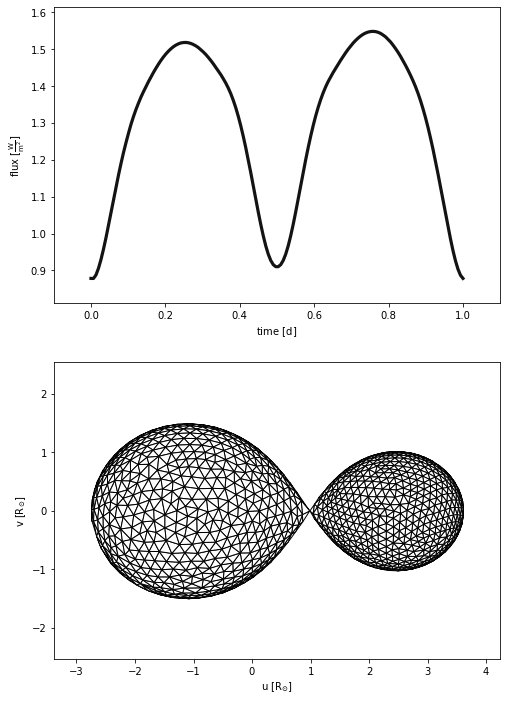

(<autofig.figure.Figure | 2 axes | 3 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [11]:
b.plot(show=True)

Sat, 10 Oct 2020 15:59 PARAMETERS   WARNING fc and ec are not allowable for dataset=lc01 with kind=lc, ignoring fc=teffs
Sat, 10 Oct 2020 15:59 PARAMETERS   WARNING fc and ec are not allowable for dataset=lc01 with kind=lc, ignoring ec=face
Sat, 10 Oct 2020 15:59 PARAMETERS   WARNING fc and ec are not allowable for dataset=lc01 with kind=lc, ignoring fc=teffs
Sat, 10 Oct 2020 15:59 PARAMETERS   WARNING fc and ec are not allowable for dataset=lc01 with kind=lc, ignoring ec=face
Sat, 10 Oct 2020 15:59 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.250000, assuming named color
Sat, 10 Oct 2020 15:59 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.250000, assuming named color


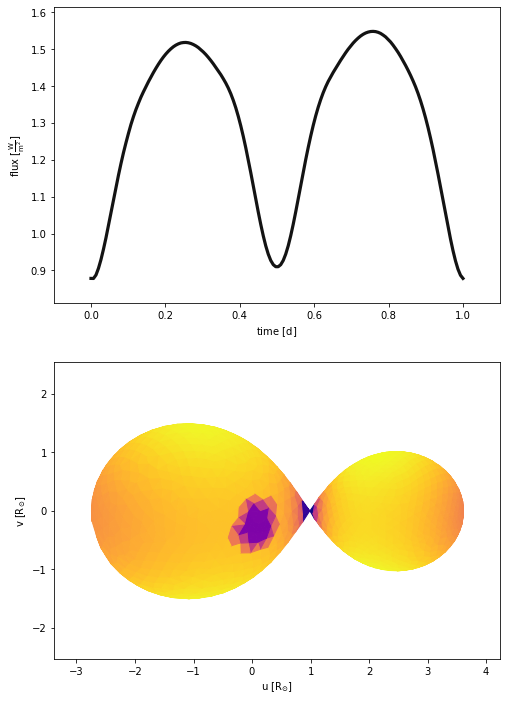

In [12]:
afig, mplfig = b.plot(fc = 'teffs', ec = 'face', fcmap= 'plasma', show = True)

In [13]:
phases = b.to_phase(times)
phases_sorted = sorted(phases)
flux = b['fluxes@model'].interp_value(phases=phases_sorted)

In [14]:
ls

data.lc  dxcode.ipynb  funcfit.ipynb  licurdata.ipynb  mcmclc.ipynb  v737per.B


In [15]:
v737 = np.loadtxt('v737per.B')

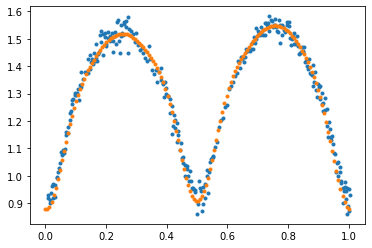

In [18]:
vdata = v737[:,1]
flux = vdata/(-2.5)
flux10 = 10**flux
plt.plot(v737[:,0]+0.005, flux10+0.07, '.')
#plt.plot(v737[:,0], -vdata+1.08, '.') #b['value@times@lc01@model']
#plt.plot(phases_sorted,flux,'.')
#ax = plt.gca()
#ax.yaxis.set_ticks_position('left') #将y轴的位置设置在右边
#ax.invert_yaxis() #y轴反向

plt.plot(b['value@times@lc01@model'], b['value@fluxes@lc01@model'], '.') 

In [17]:
print(b.filter(context='component'))

ParameterSet: 59 parameters
C        requiv@primary@component: 1.5873184290558926 solRad
C    requiv_max@primary@component: 1.5873184290558926 solRad
           teff@primary@component: 5660.0 K
           abun@primary@component: 0.0
C          logg@primary@component: 3.6382677883494225
        syncpar@primary@component: 1.0
C        period@primary@component: 1.0 d
C          freq@primary@component: 6.283185 rad / d
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
C          incl@primary@component: 78.0 deg
C       long_an@primary@component: 0.0 deg
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
C  irrad_frac_lost_bol@primary...: 0.4
    ld_mode_bol@primary@component: lookup
    ld_func_bol@primary@component: logarithmic
   ld_coeffs_source_bol@primar...: auto
C          mass@primary@component: 0.39951056910584437 solMass
C      requiv@secondary@component: 1.0858738831131962 solRad
C  requiv_max@secondary@component: 1.